# Nutrition, Physical Activity, and Obesity


### This dataset includes data on adult's diet, physical activity, and weight status from Behavioral Risk Factor Surveillance System.

In [54]:
# Loading Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.neighbors import NearestNeighbors

In [3]:
Nutrition_Activities = pd.read_csv('Nutrition__Physical_Activity__and_Obesity.csv')

In [4]:
Nutrition_Activities

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2020,2020,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,NaN,PA,PA1,Q047,VALUE,59,Race/Ethnicity,Hispanic,RACE,RACEHIS
1,2014,2014,GU,Guam,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(13.444304, 144.793731)",OWS,OWS1,Q036,VALUE,66,Education,High school graduate,EDU,EDUHSGRAD
2,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q036,VALUE,59,Income,"$50,000 - $74,999",INC,INC5075
3,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q037,VALUE,59,Income,Data not reported,INC,INCNR
4,2015,2015,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 300 min...,NaN,Value,...,NaN,PA,PA1,Q045,VALUE,59,Income,"Less than $15,000",INC,INCLESS15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88624,2021,2021,ND,North Dakota,Behavioral Risk Factor Surveillance System,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of adults who report consuming vegetab...,NaN,Value,...,"(47.47531977900047, -100.11842104899966)",FV,FV1,Q019,VALUE,38,Gender,Male,GEN,MALE
88625,2021,2021,PR,Puerto Rico,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.220833, -66.590149)",PA,PA1,Q047,VALUE,72,Income,"$35,000 - $49,999",INC,INC3550
88626,2021,2021,WI,Wisconsin,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(44.39319117400049, -89.81637074199966)",PA,PA1,Q047,VALUE,55,Income,"$75,000 or greater",INC,INC75PLUS
88627,2021,2021,UT,Utah,Behavioral Risk Factor Surveillance System,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of adults who report consuming fruit l...,NaN,Value,...,"(39.360700171000474, -111.58713063499971)",FV,FV1,Q018,VALUE,49,Income,"$50,000 - $74,999",INC,INC5075


In [6]:
Nutrition_Activities.shape

(88629, 33)

In [5]:
Nutrition_Activities.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2020,2020,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,NaN,PA,PA1,Q047,VALUE,59,Race/Ethnicity,Hispanic,RACE,RACEHIS
1,2014,2014,GU,Guam,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(13.444304, 144.793731)",OWS,OWS1,Q036,VALUE,66,Education,High school graduate,EDU,EDUHSGRAD
2,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q036,VALUE,59,Income,"$50,000 - $74,999",INC,INC5075
3,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q037,VALUE,59,Income,Data not reported,INC,INCNR
4,2015,2015,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 300 min...,NaN,Value,...,NaN,PA,PA1,Q045,VALUE,59,Income,"Less than $15,000",INC,INCLESS15


In [8]:
# Verifying all the columns

Nutrition_Activities.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [18]:
# Verify the values null about all columns

Nutrition_values = pd.DataFrame(Nutrition_Activities.isna().sum(), columns=['Total Values null'])
Nutrition_values['%_weight'] = Nutrition_values['Total Values null'].apply(lambda x: x/Nutrition_Activities.shape[0]*100)
Nutrition_values

,Total Values null,%_weight
YearStart,0,0.000000
YearEnd,0,0.000000
LocationAbbr,0,0.000000
LocationDesc,0,0.000000
Datasource,0,0.000000
Class,0,0.000000
Topic,0,0.000000
Question,0,0.000000
Data_Value_Unit,88629,100.000000
Data_Value_Type,0,0.000000


In [13]:
### Here we can drop the variable that contain more than 50% loss values, because this is not be representative. The variables with contain others null values will be treated.
### - List the columns to be drop

drop_Nutrition_columns = Nutrition_values.loc[Nutrition_values['%_weight'] > 50]

drop_Nutrition_columns

,Total Values null,%_weight
Data_Value_Unit,88629,100.000000
Data_Value_Footnote_Symbol,79851,90.095793
Data_Value_Footnote,79851,90.095793
Total,85464,96.428934
Age(years),69639,78.573605
Education,75969,85.715736
Gender,82299,92.857868
Income,66474,75.002539
Race/Ethnicity,63309,71.431473


In [14]:
drop_Nutrition_columns.index.values

array(['Data_Value_Unit', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Total', 'Age(years)', 'Education',
       'Gender', 'Income', 'Race/Ethnicity'], dtype=object)

In [19]:
Nutrition_Activities1 = Nutrition_Activities.drop(drop_Nutrition_columns.index.values, axis=1)

Nutrition_Activities.head(2)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2020,2020,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,NaN,PA,PA1,Q047,VALUE,59,Race/Ethnicity,Hispanic,RACE,RACEHIS
1,2014,2014,GU,Guam,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(13.444304, 144.793731)",OWS,OWS1,Q036,VALUE,66,Education,High school graduate,EDU,EDUHSGRAD


In [20]:
Nutrition_Activities1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88629 entries, 0 to 88628
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YearStart                  88629 non-null  int64  
 1   YearEnd                    88629 non-null  int64  
 2   LocationAbbr               88629 non-null  object 
 3   LocationDesc               88629 non-null  object 
 4   Datasource                 88629 non-null  object 
 5   Class                      88629 non-null  object 
 6   Topic                      88629 non-null  object 
 7   Question                   88629 non-null  object 
 8   Data_Value_Type            88629 non-null  object 
 9   Data_Value                 79851 non-null  float64
 10  Data_Value_Alt             79851 non-null  float64
 11  Low_Confidence_Limit       79851 non-null  float64
 12  High_Confidence_Limit      79851 non-null  float64
 13  Sample_Size                79851 non-null  flo

In [21]:
# Verify duplcated values

Nutrition_Activities1.duplicated().sum()

0

### The new dataframe 'Nutrition_Activities1' was created to preserve the integrity of the original data in 'Nutrition_Activities'

In [23]:
# Transform the columns YearStart and YearEnd into one "Year_ref"

Nutrition_Activities1.drop('YearEnd', axis=1, inplace=True)

Nutrition_Activities1.rename(columns={'YearStart': 'Year_ref'}, inplace=True)


In [25]:
Nutrition_Activities1.head(2)


,Year_ref,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Type,Data_Value,Data_Value_Alt,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2020,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,Value,30.6,30.6,...,NaN,PA,PA1,Q047,VALUE,59,Race/Ethnicity,Hispanic,RACE,RACEHIS
1,2014,GU,Guam,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,29.3,29.3,...,"(13.444304, 144.793731)",OWS,OWS1,Q036,VALUE,66,Education,High school graduate,EDU,EDUHSGRAD


In [29]:
# Checking Samples

Nutrition_Activities1.sample(4).T

,64402,52568,36558,62417
Year_ref,2015,2011,2019,2015
LocationAbbr,DE,GA,VA,OK
LocationDesc,Delaware,Georgia,Virginia,Oklahoma
Datasource,Behavioral Risk Factor Surveillance System,Behavioral Risk Factor Surveillance System,Behavioral Risk Factor Surveillance System,Behavioral Risk Factor Surveillance System
Class,Physical Activity,Obesity / Weight Status,Obesity / Weight Status,Physical Activity
Topic,Physical Activity - Behavior,Obesity / Weight Status,Obesity / Weight Status,Physical Activity - Behavior
Question,Percent of adults who engage in muscle-strengt...,Percent of adults aged 18 years and older who ...,Percent of adults aged 18 years and older who ...,Percent of adults who engage in muscle-strengt...
Data_Value_Type,Value,Value,Value,Value
Data_Value,32.3,35.9,31.9,31.0
Data_Value_Alt,32.3,35.9,31.9,31.0


In [33]:
Nutrition_Activities.LocationAbbr.unique()

array(['US', 'GU', 'WY', 'DC', 'PR', 'AL', 'RI', 'DE', 'NJ', 'WA', 'ME',
       'MI', 'VA', 'CA', 'UT', 'NY', 'MA', 'AR', 'IL', 'NH', 'NM', 'MD',
       'MN', 'HI', 'LA', 'SD', 'TX', 'KY', 'WV', 'CO', 'OK', 'MS', 'OR',
       'WI', 'KS', 'FL', 'ID', 'AZ', 'VI', 'MT', 'GA', 'NC', 'PA', 'ND',
       'SC', 'NE', 'TN', 'MO', 'NV', 'IA', 'IN', 'OH', 'AK', 'VT', 'CT'],
      dtype=object)

In [34]:
Nutrition_Activities.Class.unique()

array(['Physical Activity', 'Obesity / Weight Status',
       'Fruits and Vegetables'], dtype=object)

In [35]:
Nutrition_Activities.Topic.unique()

array(['Physical Activity - Behavior', 'Obesity / Weight Status',
       'Fruits and Vegetables - Behavior'], dtype=object)

In [36]:
Nutrition_Activities.QuestionID.unique()

array(['Q047', 'Q036', 'Q037', 'Q045', 'Q044', 'Q043', 'Q046', 'Q018',
       'Q019'], dtype=object)

In [39]:
Nutrition_Activities1.Question.unique()

array(['Percent of adults who engage in no leisure-time physical activity',
       'Percent of adults aged 18 years and older who have obesity',
       'Percent of adults aged 18 years and older who have an overweight classification',
       'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
       'Percent of adults who engage in muscle-strengthening activities on 2 or more days a we

In [40]:
Nutrition_Activities1.Class.isin(Nutrition_Activities1.Topic).unique()

array([False,  True])

In [43]:
Nutrition_Activities1.Datasource.unique()

array(['Behavioral Risk Factor Surveillance System'], dtype=object)

### Questions with your link code

In [44]:
questions_code = Nutrition_Activities1[['Question', 'QuestionID']].drop_duplicates().reset_index(drop=True)
questions_code

,Question,QuestionID
0,Percent of adults who engage in no leisure-tim...,Q047
1,Percent of adults aged 18 years and older who ...,Q036
2,Percent of adults aged 18 years and older who ...,Q037
3,Percent of adults who achieve at least 300 min...,Q045
4,Percent of adults who achieve at least 150 min...,Q044
5,Percent of adults who achieve at least 150 min...,Q043
6,Percent of adults who engage in muscle-strengt...,Q046
7,Percent of adults who report consuming fruit l...,Q018
8,Percent of adults who report consuming vegetab...,Q019


### - Printing all questions for Visualization

In [45]:
for i in questions_code.Question.values:
    print(i+'\n')

Percent of adults who engage in no leisure-time physical activity

Percent of adults aged 18 years and older who have obesity

Percent of adults aged 18 years and older who have an overweight classification

Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)

Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week

Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)

Percent of adults who engage in muscle-strengthening activities on 2 or more days a week

Percent of adults who report consuming fruit less than one

### Most Frequently Question

In [46]:
quest_freq = Nutrition_Activities1['QuestionID'].value_counts()
quest_freq

Q036    16577
Q037    16577
Q047    16549
Q045     7449
Q044     7449
Q043     7449
Q046     7449
Q018     4565
Q019     4565
Name: QuestionID, dtype: int64

In [55]:
# importing the seaborn package
import seaborn as sns

Text(0.5, 1.0, 'Frequency about questionsID')

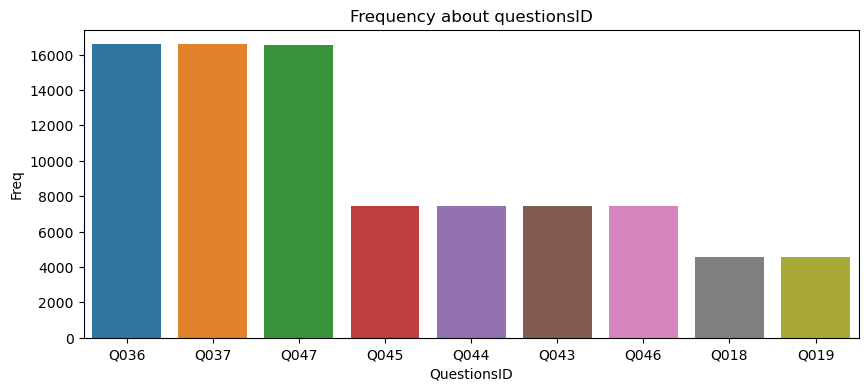

In [61]:
#plot
plt.figure(figsize=(10,4))
sns.barplot(x=quest_freq.index, y = quest_freq.values)
plt.xlabel('QuestionsID')
plt.ylabel('Freq')
plt.title('Frequency about questionsID')

In [63]:
# To get distinct occurrence of the question codes

quest_freq1 = quest_freq.value_counts()
quest_freq1

7449     4
16577    2
4565     2
16549    1
Name: QuestionID, dtype: int64

Text(0.5, 1.0, 'Frequency about questionsID')

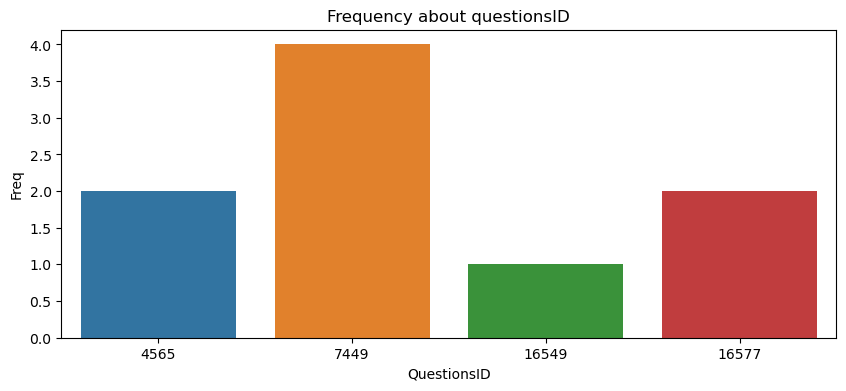

In [64]:
#plotting the distinct occurence

plt.figure(figsize=(10,4))
sns.barplot(x=quest_freq1.index, y = quest_freq1.values)
plt.xlabel('QuestionsID')
plt.ylabel('Freq')
plt.title('Frequency about questionsID')

### The distributions about Data_Values for this QuestionIDs

Text(0.5, 1.0, 'QuestionID: Q046')

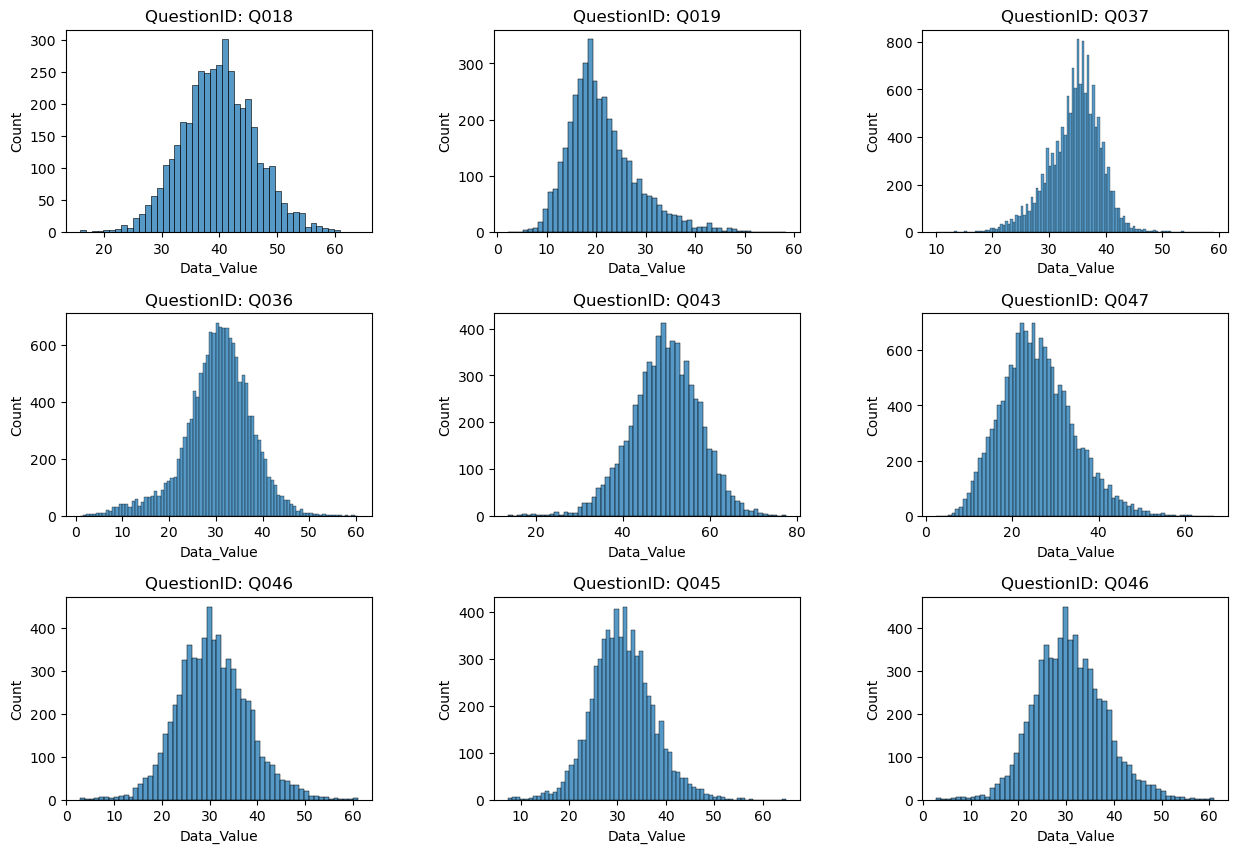

In [100]:
f, axe = plt.subplots(3, 3, figsize=(15, 10))

# Adjust the subplot layout parameters
f.subplots_adjust(hspace=0.4, wspace=0.4)

sns.histplot(Nutrition_Activities1.loc[Nutrition_Activities1.QuestionID == 'Q018'],
             x='Data_Value', ax=axe[0,0])
axe[0,0].set_title('QuestionID: Q018')
sns.histplot(Nutrition_Activities1.loc[Nutrition_Activities1.QuestionID == 'Q019'],
             x='Data_Value', ax=axe[0,1])
axe[0,1].set_title('QuestionID: Q019')
sns.histplot(Nutrition_Activities1.loc[Nutrition_Activities1.QuestionID == 'Q037'],
             x='Data_Value', ax=axe[0,2])
axe[0,2].set_title('QuestionID: Q037')
sns.histplot(Nutrition_Activities1.loc[Nutrition_Activities1.QuestionID == 'Q036'],
             x='Data_Value', ax=axe[1,0])
axe[1,0].set_title('QuestionID: Q036')
sns.histplot(Nutrition_Activities1.loc[Nutrition_Activities1.QuestionID == 'Q043'],
             x='Data_Value', ax=axe[1,1])
axe[1,1].set_title('QuestionID: Q043')
sns.histplot(Nutrition_Activities1.loc[Nutrition_Activities1.QuestionID == 'Q047'],
             x='Data_Value', ax=axe[1,2])
axe[1,2].set_title('QuestionID: Q047')
sns.histplot(Nutrition_Activities1.loc[Nutrition_Activities1.QuestionID == 'Q046'],
             x='Data_Value', ax=axe[2,0])
axe[2,0].set_title('QuestionID: Q046')
sns.histplot(Nutrition_Activities1.loc[Nutrition_Activities1.QuestionID == 'Q045'],
             x='Data_Value', ax=axe[2,1])
axe[2,1].set_title('QuestionID: Q045')
sns.histplot(Nutrition_Activities1.loc[Nutrition_Activities1.QuestionID == 'Q046'],
             x='Data_Value', ax=axe[2,2])
axe[2,2].set_title('QuestionID: Q046')

## OBESITY
### This part talks about the Obesity's age and location

In [110]:
ID_Q036 = Nutrition_Activities1.loc[Nutrition_Activities1.QuestionID=='Q036'].copy()
Top_obesity = ID_Q036.sort_values('Data_Value', ascending=False).reset_index(drop=True).head(15)

In [111]:
Top_obesity_by_Year = Top_obesity[['Year_ref', 'LocationAbbr','LocationDesc','Data_Value']].sort_values('Year_ref').reset_index(drop=True)

In [112]:
Top_obesity[['Year_ref','LocationAbbr', 'LocationDesc', 'Data_Value','Sample_Size']]

,Year_ref,LocationAbbr,LocationDesc,Data_Value,Sample_Size
0,2016,OH,Ohio,60.4,94.0
1,2021,VI,Virgin Islands,59.7,238.0
2,2011,NV,Nevada,59.2,55.0
3,2018,NC,North Carolina,58.6,82.0
4,2019,AZ,Arizona,58.0,555.0
5,2019,ND,North Dakota,57.8,181.0
6,2018,IN,Indiana,57.0,54.0
7,2014,WI,Wisconsin,56.9,96.0
8,2021,VI,Virgin Islands,56.9,101.0
9,2015,UT,Utah,56.5,50.0


In [114]:
# Grouping the obesity by Year, location and  each values

Top_obesity_by_Year = Top_obesity_by_Year.groupby(by=['Year_ref','LocationAbbr']).agg({'Data_Value':'mean'}).reset_index()
Top_obesity_by_Year

,Year_ref,LocationAbbr,Data_Value
0,2011,NV,59.2
1,2013,HI,56.2
2,2014,WI,56.9
3,2015,HI,55.3
4,2015,UT,56.5
5,2016,OH,60.4
6,2018,IN,57.0
7,2018,NC,58.6
8,2019,AZ,58.0
9,2019,ND,57.8


In [115]:
Top_obesity_by_Year.LocationAbbr.values

array(['NV', 'HI', 'WI', 'HI', 'UT', 'OH', 'IN', 'NC', 'AZ', 'ND', 'WV',
       'KS', 'VI', 'WI'], dtype=object)

In [116]:
Top_obesity_by_Year.Year_ref.values

array([2011, 2013, 2014, 2015, 2015, 2016, 2018, 2018, 2019, 2019, 2019,
       2021, 2021, 2021], dtype=int64)

In [118]:
# Yearly frequency
year_freq = Nutrition_Activities1['Year_ref'].value_counts()
year_freq


2017    13860
2019    13365
2015    10584
2013    10248
2011    10192
2021     7700
2016     4620
2018     4620
2020     4536
2014     4536
2012     4368
Name: Year_ref, dtype: int64

Text(0.5, 1.0, 'Nutrition, Activity and Obesity of Each Year')

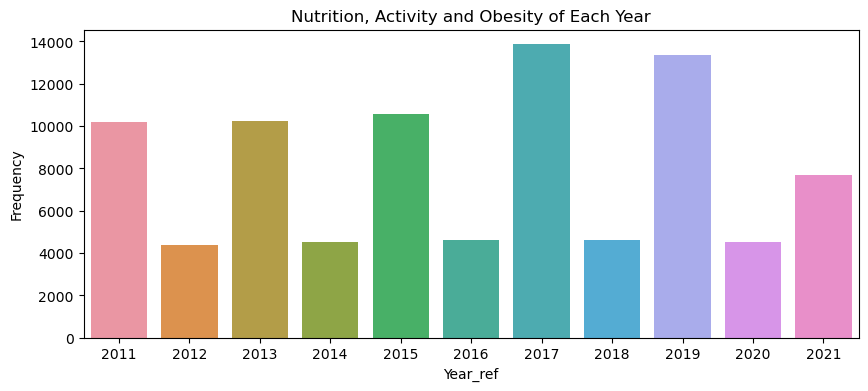

In [137]:
#plot
plt.figure(figsize=(10,4))
sns.barplot(x=year_freq.index, y = year_freq.values)
plt.xlabel('Year_ref')
plt.ylabel('Frequency')
plt.title('Nutrition, Activity and Obesity of Each Year')

In [109]:
# Checking the shape of the dataset set again

Nutrition_Activities.shape

(88629, 33)